In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)

In [4]:
# EDA 
df1 = pd.read_csv('bengaluru_house_prices (1).csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
# dropping certain columns, and assume availability, society and balcomy, area aren't relevant parameters
df2 = df1.drop(['availability','society','balcony','area_type'],axis= 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
# Data cleaning process
# Handling the na values
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# I could decide to fill the bath with median or mean prices but I decided to just drop them since we have 13000 rows
# 73 rows isn't going to make much of a difference

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 5)

In [12]:
# exploring the size featuers

In [13]:
df3['size'].unique() # givs a  panda series

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

/var/folders/jl/n_6k8qzd56lfnys7xqk8d5600000gn/T/ipykernel_32260/3303903377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [15]:
df3.head # so now this contains the number of bedrooms in the apartment

<bound method NDFrame.head of                        location       size total_sqft  bath   price  BHK
0      Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2                   Uttarahalli      3 BHK       1440   2.0   62.00    3
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                      Kothanur      2 BHK       1200   2.0   51.00    2
...                         ...        ...        ...   ...     ...  ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00    5
13316             Richards Town      4 BHK       3600   5.0  400.00    4
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00    2
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00    4
13319              Doddathoguru      1 BHK        550   1.0   17.00    1

[13246 rows x 6 columns]>

In [16]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [17]:
df3[df3.BHK>20] # 2400 sqft home with 43 bedrooms??? doesn't seem right

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
df3['total_sqft'].unique()
# need to convert the 1113-1384 to a single number so we can take the average of this

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(x):
    try:
        float(x)
    except: # throw an exception if not a number
        return False
    return True

In [20]:
df3[-df3['total_sqft'].apply(is_float)].head(10) # have to put the negative sign because it will give all 
# the values that are False
# Unstructured data in the total_sqft column

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
# going to be dropping columns that aren't in sq_ft
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
# Improvement could be converting the Sq. meter and Perch into sq_ft

In [23]:
convert_sqft_to_num('2100-2050') # took the average

2075.0

In [24]:
df4 = df3.copy() # it will create a deep copy of the original df
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [25]:
df4.loc[30] #accuratley took the average of the two columns

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [26]:
# Feature Engineering section

df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']  # conversion from lachs to us dollars
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [27]:
# check our categorical data
len(df5.location.unique()) # usually we would convert to dummy columns but this would cause too many columns
# dimensionality curse --> high dimensionality problem

1304

In [28]:
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

# determined that any location with one data point is going to be called 'other' location

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [29]:
len(location_stats[location_stats<=10])


1052

In [30]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [31]:
len(df5.location.unique())

1293

In [32]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())
# dimensionality reduction eliminated 1000 columns

242

In [33]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [34]:
#Outlier Detection
# Standard deviation or simple domain knowledge
# when you have 2 bedroom apartments it can't be 500 sqft
# "typical sqft. per bedroom is 300 sqft" is what a data scientist would say 

In [35]:
df5[df5.total_sqft/df5.BHK<300].head()
# 1000 sqft home and 6 bedrooms???
# 600 sqft home but 8 BHK????

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [36]:
df5.shape

(13246, 7)

In [37]:
df6 = df5[-(df5.total_sqft/df5.BHK<300)]
# negate to remove those rows
df6.shape

(12502, 7)

In [38]:
df6.price_per_sqft.describe()
# very unlikely that you would get 267 per sqft and max is too high
# need to remove these extreme cases

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
# standard deviation per location
# want to find mean and s.d and filter beyond that

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [40]:
# check the data itself we see that for the same location with 3 bedroom and 2 bedroom apt
# the 2 bedroom is more expensive which is worse for generalization
# due to just changing in housing market or different spacial amenites making this price different

In [41]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.BHK ==2)]
    bhk3 = df[(df.location == location) & (df.BHK ==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color = 'blue', label = '2 BHK' , s= 50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, color = 'green', label = '3 BHK' , s= 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

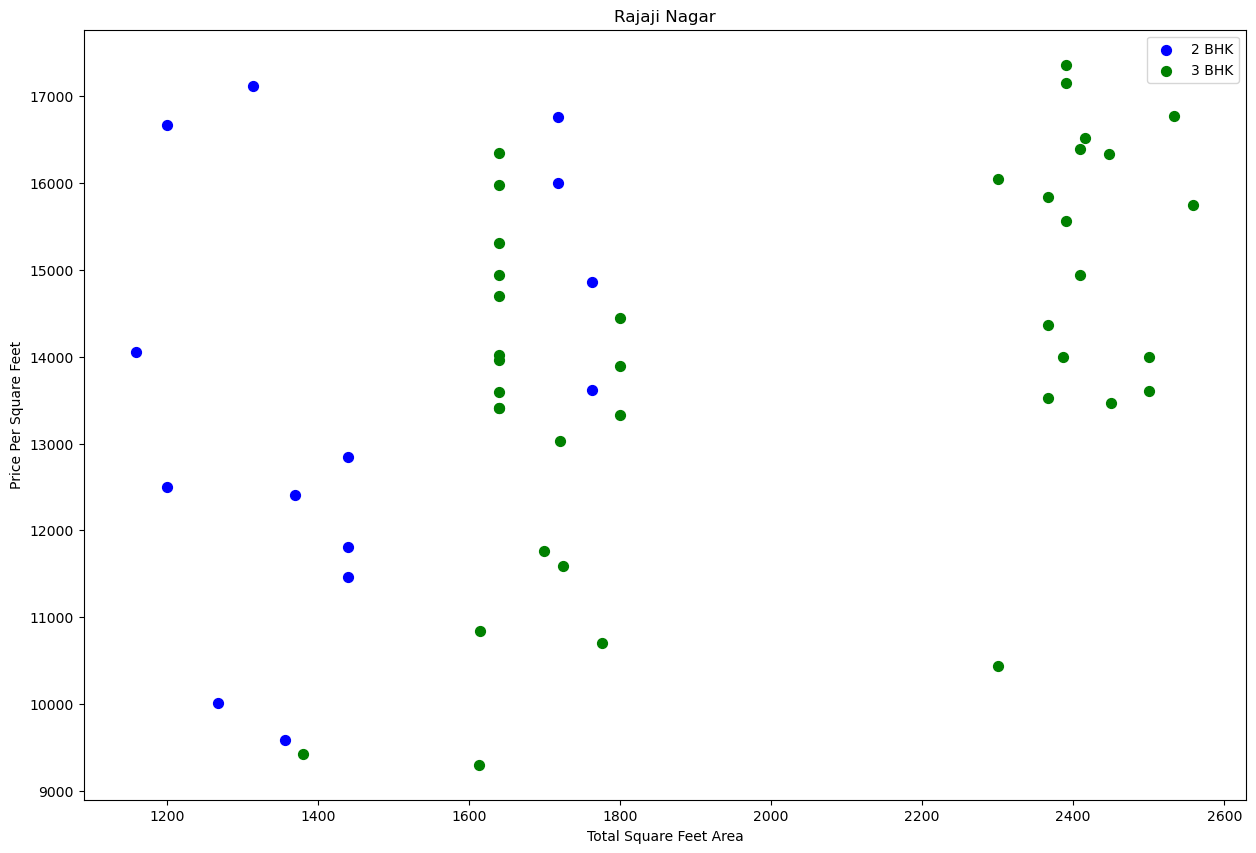

In [42]:
plot_scatter_chart(df7, "Rajaji Nagar")

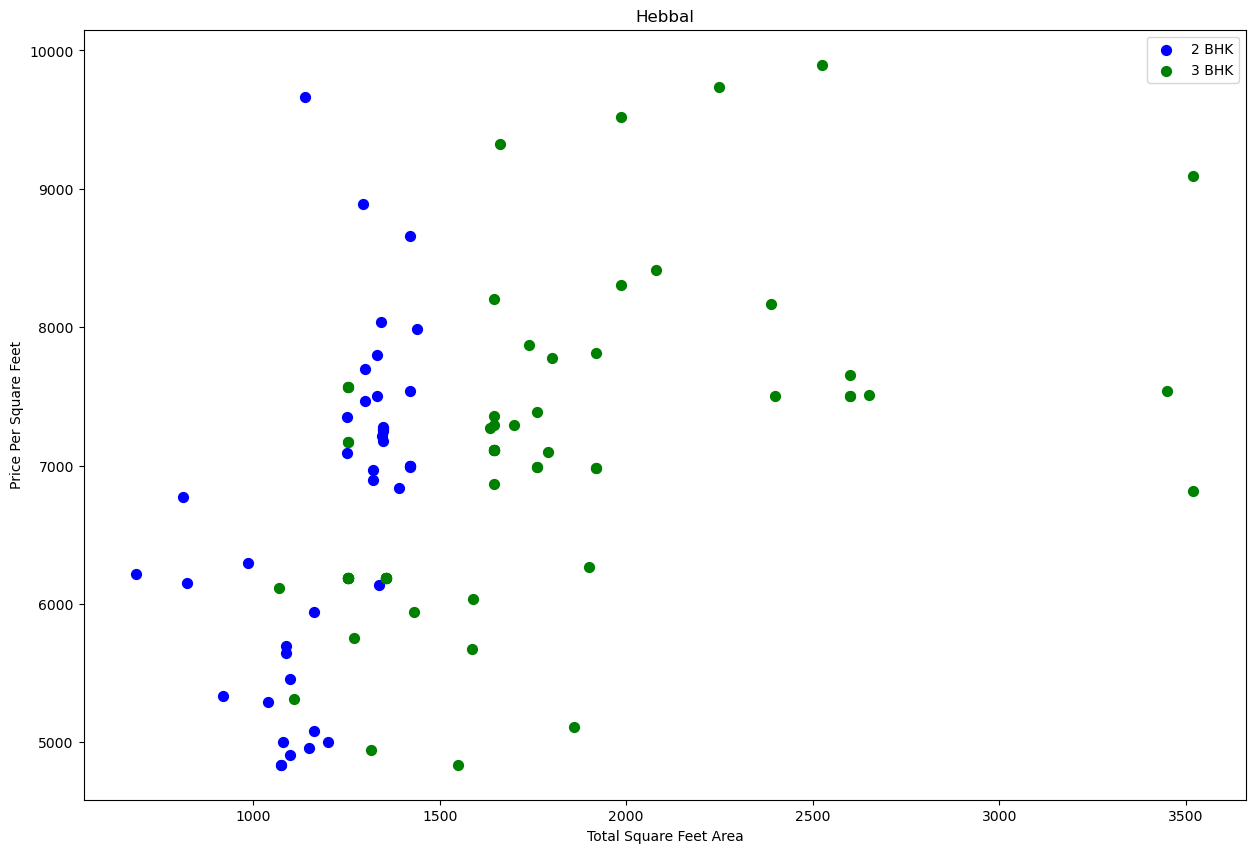

In [43]:
plot_scatter_chart(df7, "Hebbal")

In [44]:
import numpy as np
import pandas as pd

def remove_bhk_outliers(df: pd.DataFrame) -> pd.DataFrame:
    """
    Remove 2-BHK (and above) listings in each location whose price_per_sqft 
    is less than the mean price_per_sqft of 1-BHK listings (if there are 
    at least 5 one-BHK listings to compute a stable mean).
    """
    exclude_indices = []

    # compute stats for each (location, bhk)
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': bhk_df['price_per_sqft'].mean(),
                'std': bhk_df['price_per_sqft'].std(),
                'count': bhk_df.shape[0]
            }

        # for each bhk > 1, drop those below the 1-BHK mean
        for bhk, bhk_df in location_df.groupby('BHK'):
            prev_stats = bhk_stats.get(bhk - 1)
            if prev_stats and prev_stats['count'] > 5:
                low_price_mask = bhk_df['price_per_sqft'] < prev_stats['mean']
                exclude_indices.extend(bhk_df[low_price_mask].index.tolist())

    # return the filtered DataFrame
    return df.drop(index=exclude_indices)

# Example usage:
# cleaned_df = remove_bhk_outliers(df)
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

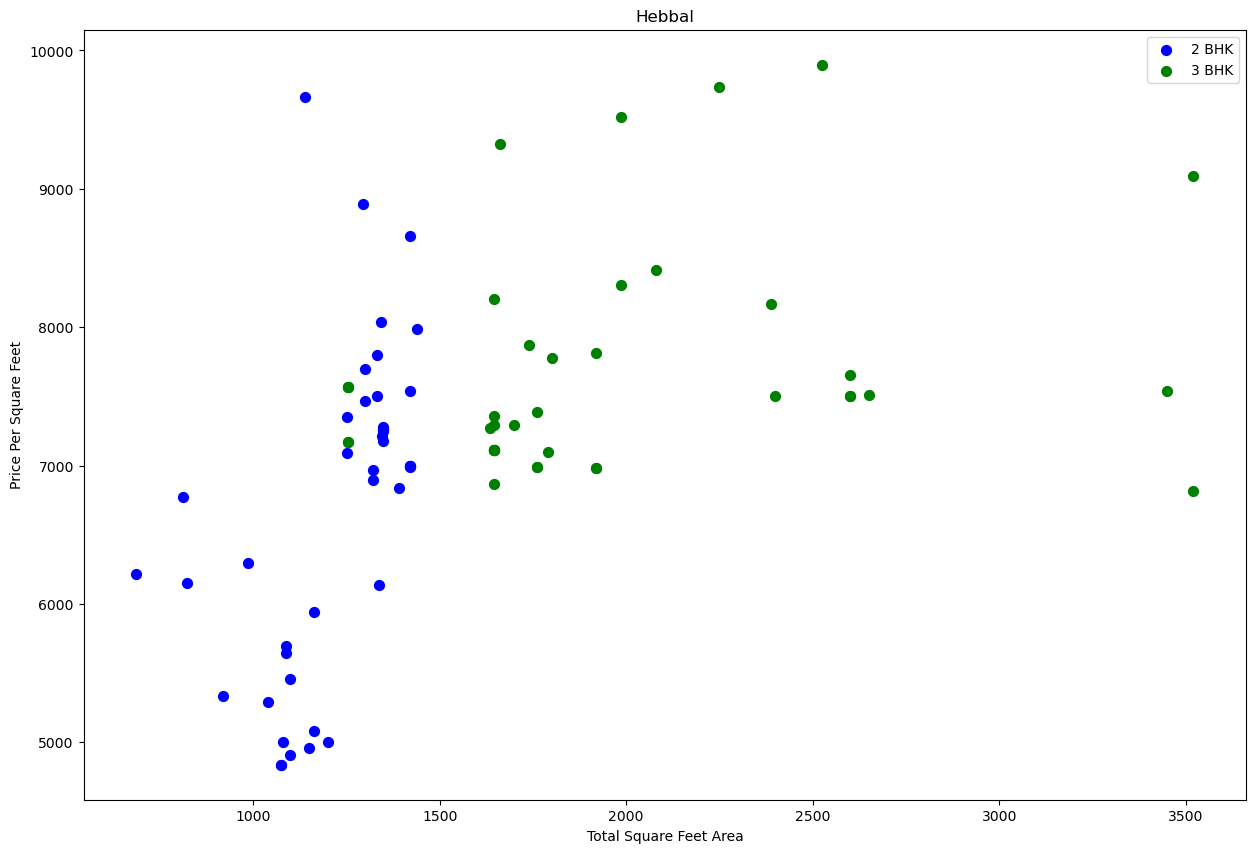

In [45]:
plot_scatter_chart(df8, "Hebbal")
# abnormalities are going to be present

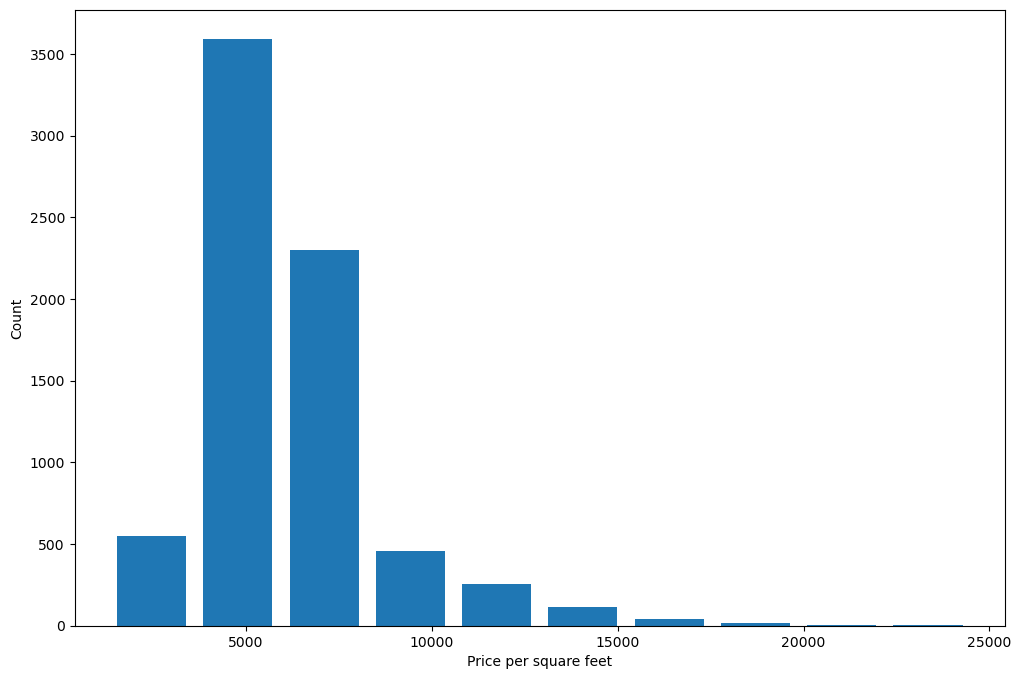

In [46]:
# plotting histograms and see how many apartments or properties I have per sqft area
plt.rcParams['figure.figsize'] = (12,8)
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count");

In [47]:
# most of the data lies between 0-10000
# has a normal distribution

In [48]:
# Now to explore the bathroom features

In [49]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [50]:
df8[df8.bath>10]
# ask business manager to remove bathroom specific outliers
# 2 bedroom apartment and 4 bathroom doesn't make sense
# anytime you have number of bathrooms greater than bedrooms + 2 it's considered an outlier

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

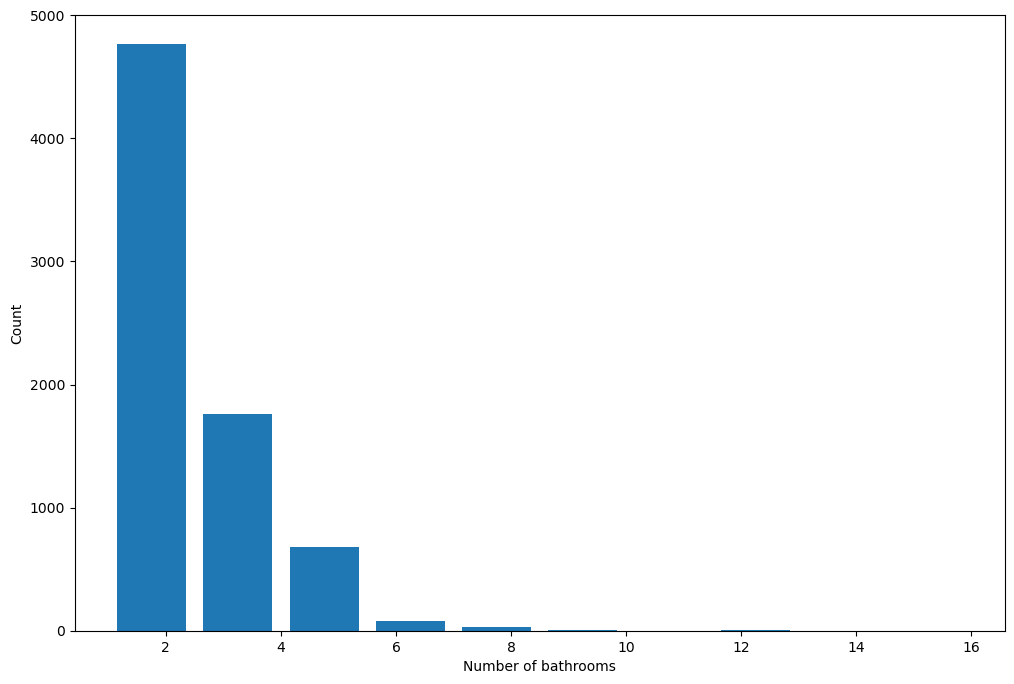

In [51]:
plt.hist(df8.bath, rwidth =0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [52]:
# few outliers
df8[df8.bath>df8.BHK + 2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [53]:
df9 = df8[df8.bath<df8.BHK+2]
df9.shape

(7251, 7)

In [54]:
# price per sqft and size feature at this point isn't necessary
# size can be dropped because we have BHK feature
# price per sqft can be dropped b/c it was for outlier detection

In [55]:
df10 = df9.drop(['size','price_per_sqft'], axis = 1)
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [56]:
# Building the model and using K-fold Cross-val and gtid search CV to see what the best model is

In [63]:
# use pandas dummies method to get rid of categorical
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df11 = pd.concat([df10, dummies.drop(['other'], axis = 'columns')], axis = 'columns')
df11.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df12 = df11.drop('location', axis ='columns')
df12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df12.shape

(7251, 245)

In [72]:
X = df12.drop('price', axis =1)
y = df12.price

In [73]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [76]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8452277697874319

In [77]:
# Going to use k-fold cross-val to find best model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 10
                 #Shuffle split will randomize the sample so that each of the fold will have equal distribution 

                
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.84522777, 0.80004632, 0.88682995, 0.842265  , 0.86250633])

In [84]:
# need to try other regression techniques
# Lasso Regression and Descision Tree Regression
# HyperParameter Tuning

from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': make_pipeline(StandardScaler(), LinearRegression()),
            'params': {
                'linearregression__fit_intercept': [True, False],
                'linearregression__copy_X': [True, False]
            }
        },
        'lasso': {
            'model': make_pipeline(StandardScaler(), Lasso()),
            'params': {
                'lasso__alpha': [1, 2],
                'lasso__selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)
# can conclude Linear Regression is the best one here

,model,best_score,best_params
0,linear_regression,0.818354,"{'linearregression__copy_X': True, 'linearregr..."
1,lasso,0.790563,"{'lasso__alpha': 1, 'lasso__selection': 'random'}"
2,decision_tree,0.718236,"{'criterion': 'squared_error', 'splitter': 'be..."


In [85]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [88]:
np.where(X.columns == '5th Phase JP Nagar')[0][0]

8

In [89]:
def predict_price(location, sqft, bath, BHK):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    if loc_index >= 0:
        x[loc_index] =1

    return lr_clf.predict([x])[0]

In [90]:
predict_price('1st Phase JP Nagar', 1000, 2,2)

/Users/taranroyyuru/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677176052

In [95]:
predict_price('1st Phase JP Nagar', 1000, 2,3)

/Users/taranroyyuru/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.72616900751511

In [ ]:
# Many samples with more BHK have less price than 2 BHK's
# Sometimes we don't have enough information on why this is the case

In [93]:
predict_price('Indira Nagar', 1000, 2,2)

/Users/taranroyyuru/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484007021

In [94]:
predict_price('Indira Nagar', 1000, 3,3)

/Users/taranroyyuru/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033617

In [96]:
# Time to export the model into a pickle file
# and used by our python flask server
# AB testing is a thing you could do later?

In [98]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [99]:
# need the columnn information

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))